#### 머신러닝 기초학습
---
##### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
 

##### 설명
- KNeighborsRegressor를 통한 학습을 배웁니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 이번에는 농어 데이터를 사용해보겠습니다. 주어진 데이터는 농어의 길이와 무게입니다.
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

Text(0, 0.5, 'weight')

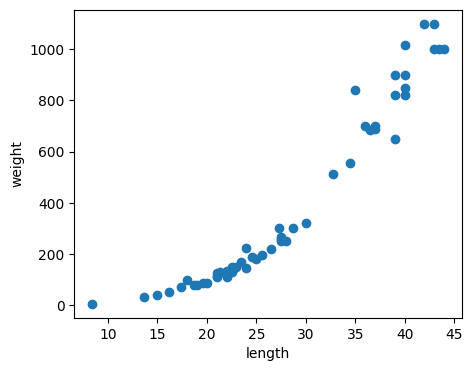

In [10]:
# 그래프 크기를 (5, 4)로 설정하고 산점도를 작성해보겠습니다.
plt.figure(figsize=(5, 4))
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

In [11]:
# 훈련 세트와 테스트 세트를 나누어 보겠습니다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                      perch_weight,
                                                                      random_state=42)

In [18]:
# 사이킷런에서 사용하는 학습 모델들은 2차원 배열을 입력받아서 사용합니다.
# (42, )의 의미는 42개의 데이터가 있는 1차원 데이터라는 의미입니다.
print('훈련 입력 모양 : {}'.format(train_input.shape))
print('훈련 결과 모양 : {}'.format(train_target.shape))

훈련 입력 모양 : (42,)
훈련 결과 모양 : (42,)


In [30]:
# 해당 데이터셋을 2차원 데이터로 만들어주기 위해서는 넘파이에서 지원하는 reshape 함수를 사용해야 합니다.
# reshape함수는 해당 배열을 지정한 크기로 바꾸어 주는 역할을 합니다.
# 12개의 데이터가 주어져있다고 가정을 해보죠.
a = np.arange(12)
print(a)
# a 배열의 모양은 어떻게 생겼을까요?
print(a.shape)
# 이 말의 의미는 12개의 값들로 이루어진 1차원 배열이라는 의미입니다.
# 이 배열을 2차원 배열로 바꿔볼까요?
# 총 데이터가 12개이니, 1*12, 2*6, 3*4, 4*3, 6*2, 12*1의 형태로 바뀔 수 있겠군요.
print('[1x12 배열] : {}'.format(a.reshape(1, 12)))
print('[2x6 배열] : {}'.format(a.reshape(2, 6)))
print('[3x4 배열] : {}'.format(a.reshape(3, 4)))
# 지정하는 형태로 바뀌는 것을 볼 수 있습니다.
# 바꿔야하는 값을 하나밖에 모를때에는 아래와 같이 -1을 대입해주면 자동으로 바뀌는 것을 꼭 알아주세요.
print('[1x12 배열] : {}'.format(a.reshape(1, -1)))
print('[2x6 배열] : {}'.format(a.reshape(2, -1)))
print('[3x4 배열] : {}'.format(a.reshape(3, -1)))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
(12,)
[1x12 배열] : [[ 0  1  2  3  4  5  6  7  8  9 10 11]]
[2x6 배열] : [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[3x4 배열] : [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[1x12 배열] : [[ 0  1  2  3  4  5  6  7  8  9 10 11]]
[2x6 배열] : [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[3x4 배열] : [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [31]:
# 훈련데이터와 테스트데이터도 2차원 데이터로 바꾸어볼까요?
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [35]:
# 이번에 사용할 모델은 저번에 공부했던 KNeighborsClassifier의 친구인 KNeighborsRegressor입니다.
# 작동방식이 비슷하기 때문에 이해하기 쉬울거에요.
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [45]:
print(knr.score(test_input, test_target))

0.992809406101064


In [39]:
# 오! 괜찮은 결과값이 나오네요!
# 이 점수는 r2 결정계수라고 하는데, 1에 가까울 수록 해당 모델은 좋은 모델이다! 라고 판단합니다.
# 더 자세히 설명하자면 r2 결정계수란 독립변수가 종속변수를 얼마나 잘 설명하는지를 나타내는거죠. 독립변수는 x, 종속변수는 y를 의미합니다.
# x와 y의 상관성이 매우 높으면, 결정계수가 높아지겠죠?
# R^2 = 1-(타깃-예측)^2의 합 / (타깃-평균)^2의 합입니다.
# 만약 타깃이 예측값에 매우 가까워졌다는 뜻은 분자가 작아졌다는 것을 뜻하기 때문에 1에 근사한 값이 나오는 거죠.
# 회귀에서 가장 많이 사용되는 지표가 RMSE, MSE, RMAE, MAE 지표입니다.
# - RMSE = Root Mean Square Error
# - MSE = Mean Square Error
# - RMAE = Root Mean Absolute Error
# - MAE = Mean Absolute Error
# 여기서 Root는 여러분이 아시는 제곱근이랍니다.

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
# 테스트셋의 결과값을 예측해볼게요.
test_prediction = knr.predict(test_input)

In [46]:
# 실제 값은 test_target이고 KNeighborsRegressor가 예측한 값이 test_prediction입니다.
mae = mean_absolute_error(test_target, test_prediction)
mse = mean_squared_error(test_target, test_prediction)
rmse = root_mean_squared_error(test_target, test_prediction)
print(mae, mse, rmse)
# 예측한 데이터가 평균 19.15714.. 정도 차이가 난다는 의미입니다.

19.157142857142862 721.7385714285714 26.865192562655704


In [47]:
# 이번에는 훈련 데이터에 대한 점수를 볼까요?
print(knr.score(train_input, train_target))

0.9698823289099254


In [48]:
# 어.. 분명 잘했다고 생각했는데 테스트에 대한 점수가 훈련에 대한 점수보다 더 높은 현상이 발생하네요.
# 이러한 현상을 과소적합이라고 이야기합니다.
# 흔히 데이터에 대한 학습에 있어서 과소적합과 과대적합에 대해 이야기합니다.
# 과대적합이란 훈련셋에 대해서 너무 많이 학습을 한거구, 과소적합이란 훈련셋에 대해서 학습을 덜 한거죠.
# 데이터 학습에 조금 손을 대볼까요?

In [52]:
# 이전에 n_neighbors를 조절할 수 있다는 것을 기억하시나요?
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print('훈련 점수는 : {}'.format(knr.score(train_input, train_target)))
print('테스트 점수는 : {}'.format(knr.score(test_input, test_target)))

훈련 점수는 : 0.9804899950518966
테스트 점수는 : 0.9746459963987609


In [54]:
# 이번에는 적절하게 학습된 것 같습니다. 그럼 r2의 값도 볼까요?
from sklearn.metrics import r2_score
r2 = r2_score(knr.predict(test_input), test_target)
print('r2의 값은 : {}'.format(r2))

r2의 값은 : 0.9749225257770853


In [55]:
# 예상대로 테스트 점수가 훈련 점수보다 낮아졌으니 과소적합에서는 벗어난 것 같네요.
# 아마 데이터의 수가 적어서 과소적합이 발생한 것 같습니다.